In [30]:
from google.cloud import bigquery
import pandas as pd
import os
import matplotlib.pyplot as plt
import yfinance as yf

In [31]:
client = bigquery.Client()

sql = f"""
    SELECT * FROM {os.getenv('TABLE_ID')} WHERE T="INTC";
    """
df = client.query(sql).to_dataframe()
df['date'] = pd.to_datetime(df['date'])


sql_2 = f"""
    SELECT * FROM {os.getenv('TABLE_ID')} WHERE T="AAPL";
    """
df2 = client.query(sql_2).to_dataframe()
df2['date'] = pd.to_datetime(df['date'])

sql_3 = f"""
    SELECT * FROM {os.getenv('TABLE_ID')} WHERE T="GOOGL";
    """
df3 = client.query(sql_3).to_dataframe()
df3['date'] = pd.to_datetime(df['date'])

    
sql_4 = f"""
    SELECT * FROM {os.getenv('TABLE_ID')} WHERE T="NVDA";
    """
df4 = client.query(sql_4).to_dataframe()
df4['date'] = pd.to_datetime(df['date'])

sql_5 = f"""
    SELECT * FROM {os.getenv('TABLE_ID')} WHERE T="AMZN";
    """
df5 = client.query(sql_5).to_dataframe()
df5['date'] = pd.to_datetime(df['date'])

In [32]:
df.rename(columns = {'close':'INTC'}, inplace = True)
df2.rename(columns = {'close':'AAPL'}, inplace = True)
df3.rename(columns = {'close':'GOOGL'}, inplace = True)
df4.rename(columns = {'close':'NVDA'}, inplace = True)
df5.rename(columns = {'close':'AMZN'}, inplace = True)

df.sort_values(by='date', inplace = True)
df2.sort_values(by='date', inplace = True)
df3.sort_values(by='date', inplace = True)
df4.sort_values(by='date', inplace = True)
df5.sort_values(by='date', inplace = True)

In [39]:
df

,T,o,INTC,h,l,date
0,INTC,35.82,35.80,36.0200,35.280,2023-08-01
1,INTC,35.15,34.39,35.1800,34.281,2023-08-02
2,INTC,34.29,34.87,35.0300,34.130,2023-08-03
3,INTC,34.48,35.14,35.5600,34.480,2023-08-04
4,INTC,35.41,35.23,35.5500,34.750,2023-08-07
5,INTC,34.67,35.02,35.1000,33.860,2023-08-08
6,INTC,35.00,34.28,35.0999,34.230,2023-08-09
7,INTC,34.70,34.68,35.0900,34.480,2023-08-10
8,INTC,34.46,34.89,34.9450,34.360,2023-08-11
9,INTC,34.67,35.68,35.7100,34.470,2023-08-14


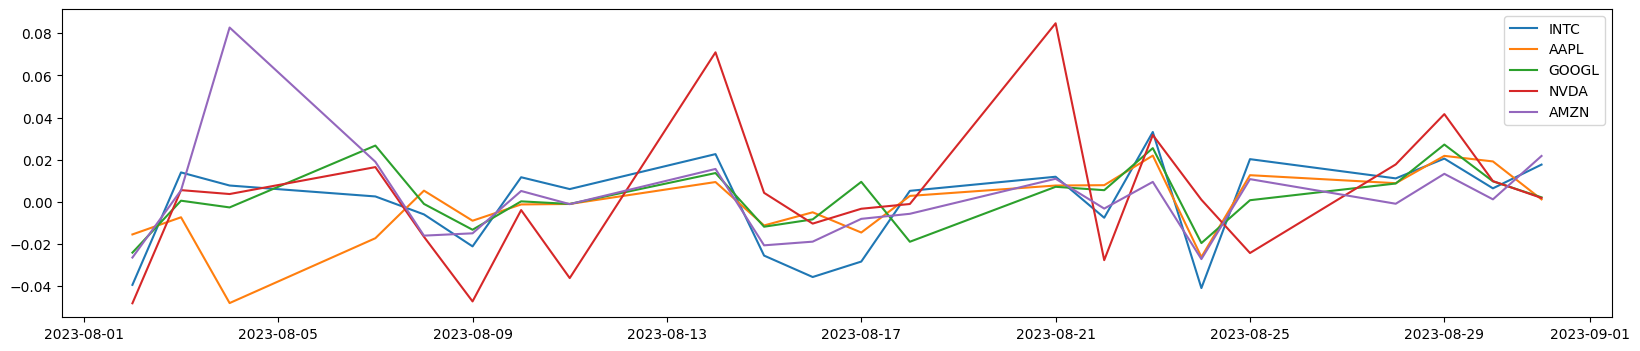

In [33]:
# Function to plot   
plt.rcParams['figure.figsize'] = [20, 4]
plt.plot(df["date"],df["INTC"].pct_change(), label ='INTC') 
plt.plot(df2["date"],df2["AAPL"].pct_change(), label ='AAPL') 
plt.plot(df3["date"],df3["GOOGL"].pct_change(), label ='GOOGL') 
plt.plot(df4["date"],df4["NVDA"].pct_change(), label ='NVDA') 
plt.plot(df5["date"],df5["AMZN"].pct_change(), label ='AMZN') 
plt.legend()
plt.show()

In [35]:
dfcomp=pd.concat([df2["AAPL"],df5["AMZN"],df3["GOOGL"],df["INTC"],df4["NVDA"]],axis=1).pct_change().corr()
dfcomp

,AAPL,AMZN,GOOGL,INTC,NVDA
AAPL,1.000000,-0.221823,0.474487,0.537322,0.303814
AMZN,-0.221823,1.000000,0.426994,0.615889,0.349306
GOOGL,0.474487,0.426994,1.000000,0.657733,0.578064
INTC,0.537322,0.615889,0.657733,1.000000,0.510401
NVDA,0.303814,0.349306,0.578064,0.510401,1.000000


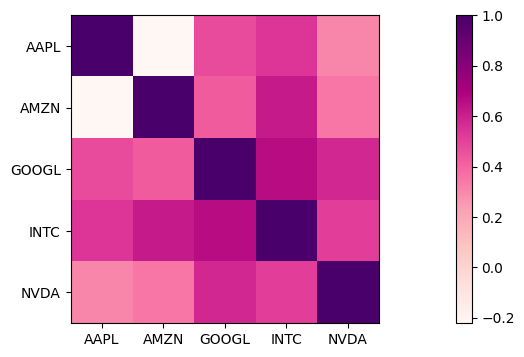

In [36]:
plt.imshow(dfcomp, cmap='RdPu', interpolation='none')
plt.colorbar()
plt.xticks(range(len(dfcomp)), dfcomp.columns)
plt.yticks(range(len(dfcomp)), dfcomp.columns)
plt.show()

In [37]:
dfcomp2 = yf.download(['INTC', 'AAPL', 'GOOGL', 'NVDA', 'AMZN'],start="2023-08-01",end="2023-08-31")['Close'].pct_change().corr()
dfcomp2

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,INTC,NVDA
AAPL,1.000000,-0.233313,0.474675,0.540112,0.304464
AMZN,-0.233313,1.000000,0.433349,0.601898,0.357438
GOOGL,0.474675,0.433349,1.000000,0.668185,0.578227
INTC,0.540112,0.601898,0.668185,1.000000,0.521334
NVDA,0.304464,0.357438,0.578227,0.521334,1.000000


In [38]:
dfcomp-dfcomp2

,AAPL,AMZN,GOOGL,INTC,NVDA
AAPL,0.000000,0.011490,-0.000187,-0.002790,-0.000650
AMZN,0.011490,0.000000,-0.006355,0.013990,-0.008132
GOOGL,-0.000187,-0.006355,0.000000,-0.010451,-0.000163
INTC,-0.002790,0.013990,-0.010451,0.000000,-0.010932
NVDA,-0.000650,-0.008132,-0.000163,-0.010932,0.000000
